### Módulo Interdisciplinario-CD2201-27 
## <center> Descripción y estimación climatológica para dos ciudades de Chile, Santiago y Puerto Montt</center>
####  Equipo Docente:
* Rodrigo Chi Durán
* Valeria Bustamante P.
* Daniela Parra
* Bárbara Rocco 

####  Nombre Alumnos: 
* Benjamín Aguilar Osorio
* Diego Céspedes Castillo


### RESUMEN
En este trabajo se pretenderá alcanzar un mayor nivel de comprensión sobre las variables que influencian la diferencia de precipitaciones en dos ciudades de Chile, buscando encontrar y comprender que factores afectan la ocurrencia de estas. Para proceder con el trabajo se usaran datos meteorológicas reales, y se propondrá un modelo, el cual se usara para predecir la lluvia, y se calculara la efectividad de las predicciones.
    Luego de finalizado el trabajo se pudo determinar que los factores climaticos,presion,temperatura y humedad relativa, determinan la ocurrencia de precipitaciones, pero no con una efectividad absoluta(90\% para Santiago y 70\% para Puerto Montt).


### INTRODUCCION
Inicialmente se tiene un desconocimiento de la causa de la existencia de una diferencia de precipitaciones entre dos ciudades de Chile, Santiago y Puerto Montt las cuales presentan condiciones climáticas diferente.

La motivación para estudiar el problema es la siguiente, para cualquier persona que haya estado en las dos ciudades podrá haber apreciado una diferencia perceptible en el clima de las ciudades principalmente en las precipitaciones, todo parece indicar hay una diferencia notable entre las precipitaciones de ambas ciudades, pero que tan fundamentada es esta intuición y en caso de haber una diferencia, de qué forma se puede apreciar esta diferencia.
De la información obtenida de (cita), se conocen que los climas de ambas ciudades son distintos, donde Santiago presenta periodos secos además de existir una diferencia en el número de precipitaciones entre ambas ciudades. En líneas generales se sabe que en Puerto Montt se generan un mayor número de precipitaciones anuales en comparación a Santiago, pero no se sabe realmente cual es la causa de este fenómeno.\
Para buscar explicar esta diferencia se realizará un estudio basado en datos climatológicos (Presión, Humedad, Temperatura y Precipitaciones) de ambas ciudades durante los años 1993-2019. Este estudio se realizaría con el objetivo de encontrar una explicación a la diferencia de precipitaciones en ambas ciudades, a través de una breve búsqueda bibliográfico se pudo llegar a un modelo simplificado de los fenómenos físicos que da indicios de que ciertas variables influencian las precipitaciones, que permitiera estudiar la precipitación basándose en los datos que eran posibles de recabar en las estaciones meteorológicas de chile,  para esto mediante herramientas de análisis de datos se relacionarán las distintas variables climáticas (Presión, Humedad y Temperatura), para encontrar una dependencia de estas con las precipitaciones.


### DESARROLLO

Antes de empezar el desarrollo del informe es conveniente dar algunas definiciones básicas:
## Definiciones básicas:
* Precipitación: La precipitación es la caída de partículas de agua líquida o sólida que se originan en una nube, atraviesan la
atmósfera y llegan al suelo. La cantidad de precipitación es el volumen de agua lluvia que pasa a través de una
superficie en un tiempo determinado (IDEAM)
* Temperatura: Magnitud física que caracteriza el movimiento aleatorio media de las moléculas en un cuerpo físico.

* Humedad Relativa: Es el vapor de agua que existe en una masa de aire, expresado como un porcentaje de la cantidad total que
existiría si el aire estuviese saturado a esta temperatura. Se expresa en unidades enteras que van de cero (0)
hasta el 100% (IDEAM)
* Presión (fuerza por unidad de área) ejercida por la atmósfera sobre cualquier superficie en virtud de su peso.
Equivale al peso de una columna de aire de sección transversal unitaria que se extiende desde un nivel dado
hasta el límite superior de la atmósfera.


El proceso mediante el cual el agua en forma gaseosa(nube), pasa a forma líquida, es un proceso de cambio de fase, tiene el nombre de condensación, y las condiciones para que ocurra se pueden aproximar con la ecuación de Clausius-Clapeyron simplificada:
\begin{equation}
P_{vapor}=P_{0}\exp^{\frac{-h}{RT}}
\end{equation}
Esta expresión se puede combinar con la humedad relativa (HR), para obtener la siguiente relación.
\begin{equation}
(HR)=100\frac{P_{H_{2}O}} {P_{vapor}}
\end{equation}
Que se mide en porcentajes.
Combinando estas expresiones se puede apreciar que la condensación del agua está relacionada con la Presión Atmosférica, temperatura y humedad relativa.


Se usarán herramientas de análisis de datos para verificar estas dependencias con datos extraídos de https://climatologia.meteochile.gob.cl/ de las ciudades Puerto Montt y Santiago, pero antes se hará una comparación de los datos de las dos ciudades

**Importar librerias de Python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

**Importar Datos**

Para este informe los datos recopilados fueron obtenidos de la página web de la Dirección Meteorológica de Chile, estos vienen en datasets separados los cuales vienen clasificados por fecha, hora y por la característica climática medida (temperatura, humedad, presión y precipitaciones).

Para trabajar con los datos incialemnte se tendran que juntar los dataset en uno solo para cada ciudad, en donde concuerden las fechas de las medicioens de estos. Comencemos con el dataset de Santiago

In [2]:
temperatura_1=pd.read_csv('temperature_qn.csv',sep=';')
auxiliar=temperatura_1.momento.str.split(expand=True)
#######
temperatura_1['momento']=auxiliar[0]
temperatura_1=temperatura_1.groupby('momento',sort=False).mean()
temperatura_1=temperatura_1.rename(columns={'CodigoNacional':'codigo'},inplace = False)
#######
presion_1=pd.read_csv('pressure_qn.csv',sep=';')
auxiliar=presion_1.momento.str.split(expand=True)
presion_1['momento']=auxiliar[0]
presion_1=presion_1.groupby('momento',sort=False).mean()
########
humedad_1=pd.read_csv('humidity_qn.csv',sep=';')
auxiliar=humedad_1.momento.str.split(expand=True)
humedad_1['momento']=auxiliar[0]
humedad_1=humedad_1.groupby('momento',sort=False).mean()
#####
lluvia_1=pd.read_csv('rainfall_qn.csv',sep=';')
auxiliar=lluvia_1.momento.str.split(expand=True)
lluvia_1['momento']=auxiliar[0]
lluvia_1=lluvia_1.groupby('momento',sort=False).mean()


Uniendo los dataset de Santiago tomando como fecha incial de medicion el 1 de Enero de 1993, se eligió esta fecha porque desde 1966 a 1993, los datos estaban incompletos faltando la mayoría de la información en estos años.

In [3]:

santiago=pd.merge(temperatura_1,presion_1,how='inner',on='momento')
#purto_montt=puerto_montt.dropna()
santiago=pd.merge(santiago,humedad_1,how='inner',on='momento')
santiago=pd.merge(santiago,lluvia_1,how='inner',on='momento')
santiago=santiago.dropna()
santiago=santiago[368:]

In [4]:
santiago=santiago[['codigo','Ts_Valor','QFE_Valor','RRR24_Valor','HR_Valor']]

Realizando  el procesos analogo para los dataset de Puerto Montt

In [5]:
temperatura_2=pd.read_csv('temperature_pm.csv',sep=';')
auxiliar=temperatura_2.momento.str.split(expand=True)
#######
temperatura_2['momento']=auxiliar[0]
temperatura_2=temperatura_2.groupby('momento',sort=False).mean()
temperatura_2=temperatura_2.rename(columns={'CodigoNacional':'codigo'},inplace = False)
#######
presion_2=pd.read_csv('pressure_pm.csv',sep=';')
auxiliar=presion_2.momento.str.split(expand=True)
presion_2['momento']=auxiliar[0]
presion_2=presion_2.groupby('momento',sort=False).mean()
#######
humedad_2=pd.read_csv('humidity_pm.csv',sep=';')
auxiliar=humedad_2.momento.str.split(expand=True)
humedad_2['momento']=auxiliar[0]
humedad_2=humedad_2.groupby('momento',sort=False).mean()
######
lluvia_2=pd.read_csv('rainfall_pm.csv',sep=';')
auxiliar=lluvia_2.momento.str.split(expand=True)
lluvia_2['momento']=auxiliar[0]
lluvia_2=lluvia_2.groupby('momento',sort=False).mean()

Uniendo los dataset de Puerto Montt tomando como fecha inicial de medición el 1 de Enero de 1993, esto se basa en la misma razon descrita para el caso de Santiago.

In [6]:
puerto_montt=pd.merge(temperatura_2,presion_2,how='inner',on='momento')
#purto_montt=puerto_montt.dropna()
puerto_montt=pd.merge(puerto_montt,humedad_2,how='inner',on='momento')
puerto_montt=pd.merge(puerto_montt,lluvia_2,how='inner',on='momento')
puerto_montt=puerto_montt.dropna()
puerto_mont=puerto_montt[['codigo','Ts_Valor','QFE_Valor','RRR24_Valor','HR_Valor']]
np.count_nonzero(puerto_montt['RRR24_Valor'])
puerto_montt=puerto_montt[18:]

In [7]:
puerto_montt=puerto_montt[['codigo','Ts_Valor','QFE_Valor','RRR24_Valor','HR_Valor']]

**Finalmente los dataset son los siguientes**



In [8]:
puerto_montt.head()

,codigo,Ts_Valor,QFE_Valor,RRR24_Valor,HR_Valor
momento,,,,,
01-01-1993,410005,13.921739,1008.514286,0.0,85.260870
02-01-1993,410005,15.125000,1005.487500,0.0,81.750000
03-01-1993,410005,16.650000,1003.462500,0.0,78.083333
04-01-1993,410005,16.329167,1006.300000,0.6,81.583333
05-01-1993,410005,12.979167,1007.462500,0.0,75.750000


In [9]:
santiago.head()

,codigo,Ts_Valor,QFE_Valor,RRR24_Valor,HR_Valor
momento,,,,,
01-01-1993,330020,27.30,951.275,0.0,44.25
02-01-1993,330020,26.44,950.840,0.0,48.80
03-01-1993,330020,21.28,953.140,0.0,67.20
04-01-1993,330020,19.88,954.700,0.0,64.60
05-01-1993,330020,24.82,953.560,0.0,52.60


**¿Como son las condiciones climáticas para cada ciudad?**

Volviendo al objetivo principal de este trabajo, inicialmente se buscará encontrar un punto de comparación de las condiciones climáticas para los datos. Los datos que se tienen vienen etiquetados por día y año por lo que inicialmente para comparar las condiciones climáticas entre ambas ciudades se generaran gráficos para cada ciudad de cada condición climática, para tener una noción inicial de las diferencias. Para evitar tener una gran cantidad de datos los gráficos se realizarán solamente para el primer año de medición de ambas ciudades (1993-1994).


**Graficando las precipitaciones se tendrá:**

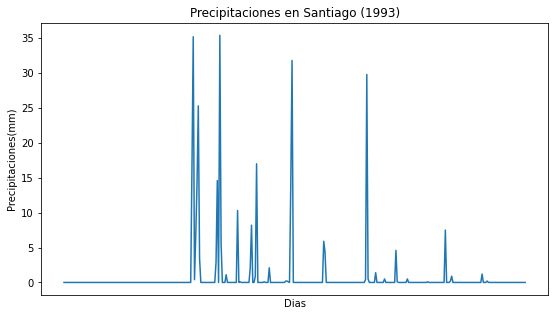

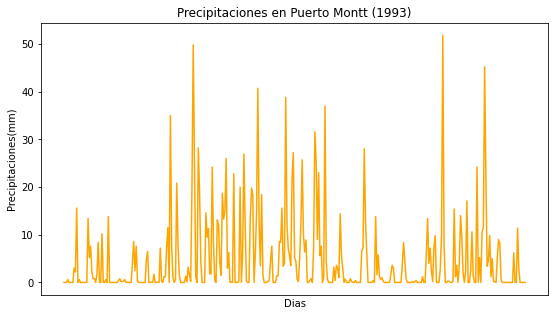

In [10]:
santiago1=santiago[0:365]
puerto_montt1=puerto_montt[0:365]

fig_1=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(santiago1['RRR24_Valor'])
plt.xticks( [], rotation ='horizontal') 
plt.xlabel('Dias')
plt.ylabel('Precipitaciones(mm)')
plt.title('Precipitaciones en Santiago (1993)')

fig_2=plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(puerto_montt1['RRR24_Valor'],color='orange')
plt.xticks( [], rotation ='horizontal')
plt.xlabel('Dias')
plt.ylabel('Precipitaciones(mm)')
plt.title('Precipitaciones en Puerto Montt (1993)')
plt.show()

**Graficando las temperaturas se tendrá:**

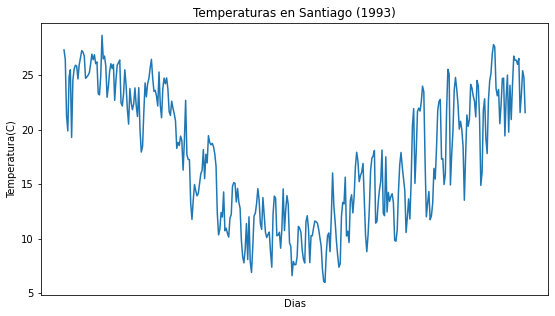

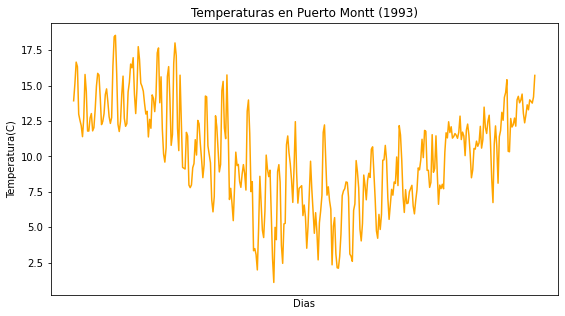

In [11]:
fig_1=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(santiago1.index.values,santiago1['Ts_Valor'])
plt.xticks( [], rotation ='horizontal')
plt.xlabel('Dias')
plt.ylabel('Temperatura(C)')
plt.title('Temperaturas en Santiago (1993)')

fig_2=plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(puerto_montt1['Ts_Valor'], color='orange')
plt.xticks( [], rotation ='horizontal')
plt.xlabel('Dias')
plt.ylabel('Temperatura(C)')
plt.title('Temperaturas en Puerto Montt (1993)')
plt.show()

**Graficando las presiones atmosféricas se tendrá:**

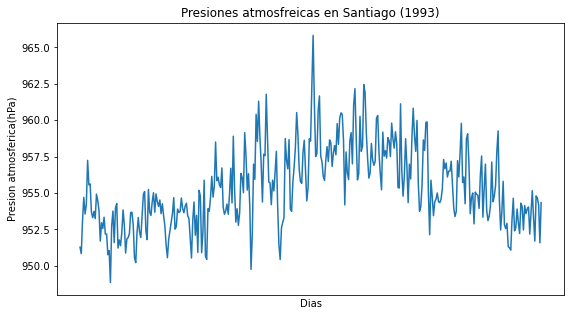

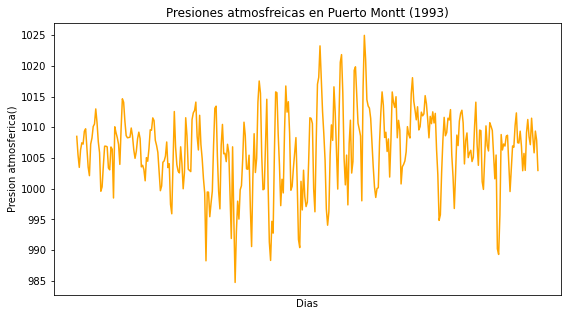

In [12]:
fig_1=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(santiago1['QFE_Valor'])
plt.xticks( [], rotation ='horizontal')
plt.xlabel('Dias')
plt.ylabel('Presion atmosferica(hPa)')
plt.title('Presiones atmosfreicas en Santiago (1993)')

fig_2=plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(puerto_montt1['QFE_Valor'], color='orange')
plt.xticks( [], rotation ='horizontal')
plt.xlabel('Dias')
plt.ylabel('Presion atmosferica()')
plt.title('Presiones atmosfreicas en Puerto Montt (1993)')
plt.show()

**Graficando la humedad relativa se tendrá:**

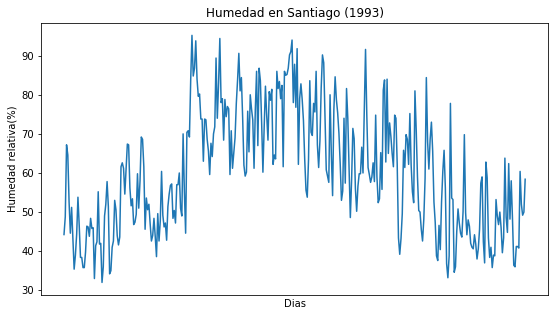

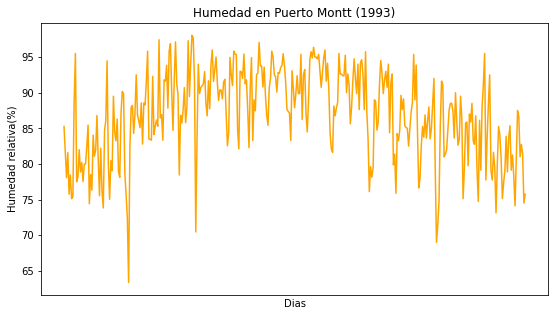

In [13]:
fig_1=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(santiago1['HR_Valor'])
plt.xticks( [], rotation ='horizontal')
plt.xlabel('Dias')
plt.ylabel('Humedad relativa(%)')
plt.title('Humedad en Santiago (1993)')

fig_2=plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(puerto_montt1['HR_Valor'], color='orange')
plt.xticks( [], rotation ='horizontal')
plt.xlabel('Dias')
plt.ylabel('Humedad relativa(%)')
plt.title('Humedad en Puerto Montt (1993)')
plt.show()

Estos gráficos ayudan a tener una impresión inicial de que tanto difieren las condiciones climáticas en ambas ciudades, pero esta impresión no es lo suficientemente concreta. Para entender mejor las diferencias climáticas entre las ciudades se darán valores numéricos a estas comparaciones para así ver la verdadera diferencia.

Para cuantificar estas diferencias se ocupará la siguiente función, la cual calcula los promedios normalizados en ambas ciudades y devuelve estos junto a las diferencias en porcentaje de estos promedios. Se normalizan las cantidades para que la comparación de las variaciones sean equitativas.

In [14]:
#calcular los promedios y las diferencias de promedios normalizados para dos valores cualquiera
def promedio(a,b):
    c=sum(a)/len(a)
    d=sum(b)/len(b)
    c=c/max(a)
    d=d/max(b)
    #Devuelve los promedios de cada ciudad, junto a la diferencia en porcentaje de estos promedios
    return (c,d,abs((c-d)/min(c,d))*100)

Ahora se ocuparán todos los datos para calcular los promedios, se tendrán que estos son los siguientes:

**Precipitaciones**

In [15]:
promedio(puerto_montt['RRR24_Valor'],santiago['RRR24_Valor'])

(0.0425266632284683, 0.007026854245602872, 505.202011342128)

**Temperaturas**

In [16]:
promedio(puerto_montt['Ts_Valor'],santiago['Ts_Valor'])

(0.42633583598252456, 0.5404280455029065, 26.761111755348317)

**Presión atmosférica**

In [17]:
promedio(puerto_montt['QFE_Valor'],santiago['QFE_Valor'])

(0.978942088078084, 0.9872778240754565, 0.8515045066391694)

**Humedad relativa**

In [18]:
promedio(puerto_montt['HR_Valor'],santiago['HR_Valor'])

(0.8515463833055377, 0.6352570994368414, 34.0475193524697)

**Estos resultados se pueden analizar de mejor manera en la siguiente tabla**

|                          	| Puerto Montt 	| Santiago 	| Diferencia(%) 	|
|--------------------------	|--------------	|----------	|---------------	|
| Precipitaciones(mm)      	| 0.0425       	| 0.0070   	| 505.2020      	|
| Temperaturas(C)          	| 0.4263       	| 0.5404   	| 26.7611       	|
| Presion atmosferica(hPa) 	| 0.9789       	| 0.9872   	| 0.8515        	|
| Humedad Relativa(%)      	| 0.8515       	| 0.6352   	| 34.0475       	|

Con esta información se puede cuantificar las diferencias climáticas mencionadas en un inicio. De esta manera se sabrá que las precipitaciones y las humedades relativas son mayores en Puerto Montt, mientras que las temperaturas y la presión atmosférica son mayores en Santiago. En particular se pueden identificar las precipitaciones como la característica que más diverge. Para continuar con el estudio, este se enfocará en las precipitaciones, al ser esta la que posee una diferencia más grande entre ambas ciudades.

# Aplicacion del metodo

Como ya se encontraron las diferencias numéricas entre las precipitaciones, ahora se procederá a analizar solamente el hecho de que existan precipitaciones, sin importar la cantidad de mm que caen. Bajo esta idea se procederá a modificar el dataset de tal manera que los días con precipitaciones los registre como 0, y los días con precipitaciones los registre como 1.

Se tendrá así lo siguiente:

In [19]:
puerto_montt_int=puerto_montt
puerto_montt_int['RRR24_Valor']=puerto_montt_int['RRR24_Valor']>0
puerto_montt_int['RRR24_Valor']=puerto_montt_int['RRR24_Valor'].astype(int)
santiago_int=santiago
santiago_int['RRR24_Valor']=santiago_int['RRR24_Valor']>0
santiago_int['RRR24_Valor']=santiago_int['RRR24_Valor'].astype(int)

Se generan dos histogramas para poder observar gráficamente las diferencias de precipitaciones entre ambas ciudades.

#### Para Santiago se tiene:

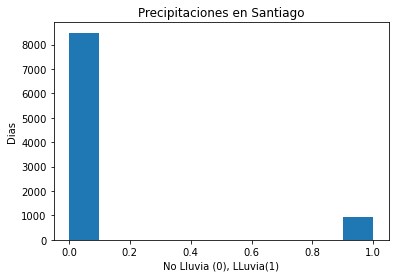

In [20]:
plt.hist(santiago_int['RRR24_Valor'])
plt.xlabel('No Lluvia (0), LLuvia(1)')
plt.ylabel('Dias')
plt.title('Precipitaciones en Santiago')
plt.show()

La cantidad de días que llueve y que no llueve serán respectivamente:

In [21]:
santiago_llueve=np.count_nonzero(santiago_int['RRR24_Valor'])
santiago_nollueve=len(santiago_int['RRR24_Valor'])-santiago_llueve
print(santiago_llueve,'y ',santiago_nollueve)

935 y  8487


 #### Realizando el proceso análogo para Puerto Montt se tiene lo siguiente:

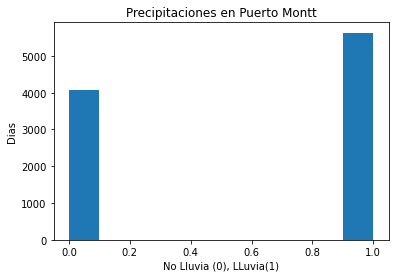

In [22]:
plt.hist(puerto_montt_int['RRR24_Valor'])
plt.xlabel('No Lluvia (0), LLuvia(1)')
plt.ylabel('Dias')
plt.title('Precipitaciones en Puerto Montt')
plt.show()

La cantidad de días que llueve y que no llueve serán respectivamente:

In [23]:
puerto_montt_llueve=np.count_nonzero(puerto_montt_int['RRR24_Valor'])
puerto_montt_nollueve=len(puerto_montt_int['RRR24_Valor'])-puerto_montt_llueve
print(puerto_montt_llueve,'y',puerto_montt_nollueve)

5631 y 4064


La cantidad de días lluviosos en puerto Montt es evidentemente mayor que la de Santiago, pero a que se debe esto. La información presentada inicialmente nos describe una relación entre las precipitaciones y las otras características climáticas. Para comprobar esta información se llevará a acabo un estudio probabilístico, en el cual mediante el uso de los datos de ambas ciudades, se buscara comprobar la dependencia descrita por la ecuación Clausius-Clapeyron , donde se relacionan las precipitaciones, con la presión temperatura y humedad relativa, para esto se ocupara el metodo de los K-Vecinos mas proximos, que se describe a continuacion.

# K vecinos más próximos
Es un metodo de clasificacion, que pretende mediante un conjunto de entrenamiento, clasificar un punto ajeno a este conjunto asignandole un cierto tipo dependiendo de sus caracteristicas, el metodo funciona de la siguiente forma en el plano $\mathbb{R}^{N}$, recibe una informacion de entrenamiento de M  vectores de  $\mathbb{R}^{N}$ cada uno con un cierto tipo asignado, luego de entrenado el clasificador con estos $N$ vectores, para clasificar un punto arbitrario,$x$  se van trazando bolas centradas en este punto hasta, que una bola intersecte a $k$ puntos o vecinos que forman parte del conjunto con el que se entreno al clasificador, cuando la bola intersecta a los $k$ vecinos, compara el tipo de los $k$ vecinos, y el que sea mayoritario es asignado el tipo de estos.

Para comprobar las hipótesis planteadas, en relación a la dependencia de la lluvia con las otras variables, se creará un conjunto de entrenamiento compuesto por el 80\% de los días, estos días serán elegidos de manera aleatoria, y el 20\% de los días restantes, se usaran para comprobar la efectividad de nuestra predicción.

Para el caso del clasificador que se aplicara, los puntos que se compraran serán vectores compuestos por, presión, temperatura y humedad relativa de un determinado día, y el tipo que se le asignara a los días, será la condición de lluvia o no lluvia.

Aplicando este método se tendrá lo siguiente:

### Para Santiago:

Primeramente, se normalizarán los datos, para que no haya un sesgo innecesario debido a las diferencias de unidades entre los datos:

In [24]:
santiago_int=santiago
santiago_int.loc[:,'HR_norm']=santiago['HR_Valor']/np.max(santiago['HR_Valor'])
santiago_int.loc[:,'Ts_norm']=santiago['Ts_Valor']/np.max(santiago['Ts_Valor'])
santiago_int.loc[:,'QFE_norm']=santiago['QFE_Valor']/np.max(santiago['QFE_Valor'])
santiago_int.head()

,codigo,Ts_Valor,QFE_Valor,RRR24_Valor,HR_Valor,HR_norm,Ts_norm,QFE_norm
momento,,,,,,,,
01-01-1993,330020,27.30,951.275,0,44.25,0.448783,0.900990,0.982760
02-01-1993,330020,26.44,950.840,0,48.80,0.494929,0.872607,0.982311
03-01-1993,330020,21.28,953.140,0,67.20,0.681542,0.702310,0.984687
04-01-1993,330020,19.88,954.700,0,64.60,0.655172,0.656106,0.986299
05-01-1993,330020,24.82,953.560,0,52.60,0.533469,0.819142,0.985121


Ahora se creará el clasificador, donde se especificara la cantidad de vecinos que utilizara el clasificador:

In [25]:
classifier_santiago = neighbors.KNeighborsClassifier(n_neighbors=100, weights='distance')

Se dividirán los datos tal y como se describió en la explicación del método:

In [26]:
santiago_random=santiago_int.sample(frac=1)
eje_x1=santiago_random[['HR_norm','Ts_norm','QFE_norm']]
eje_y1=santiago_random['RRR24_Valor']
entrenamiento_x1=eje_x1[:7537]
entrenamiento_y1=eje_y1[:7537]
prueba_x1=eje_x1[7537:]
prueba_y1=eje_y1[7537:]

Se entrenará el clasificador con los datos elegidos aleatoriamente:

In [27]:
classifier_santiago.fit(entrenamiento_x1,entrenamiento_y1)

KNeighborsClassifier(n_neighbors=100, weights='distance')

Usando el clasificador ya entrenado, se predice el tipo de los días restantes y  se comprueba la efectividad de la predicción.

In [28]:
test1=classifier_santiago.predict(prueba_x1)
accuracy_score(test1,prueba_y1)

0.9018567639257294

Se obtiene asi que el porcentaje de precision del clasificador es de $\approx 90\%$	.

### Ahora se procederá a ver el funcionamiento de este método mediante el siguiente gráfico:

Ordenando los datos para que se puedan graficar con mayor facilidad:

In [29]:
conjunto_prueba_santiago=prueba_x1
conjunto_prueba_santiago['RRR24_Valor']=test1
santiago_0_inicial=santiago_random[:7537]
santiago_0_inicial= santiago_random[(santiago_random['RRR24_Valor']==0)]

santiago_1_inicial=santiago_random[:7537]
santiago_1_inicial=santiago_random[(santiago_random['RRR24_Valor']>0)]


santiago_0_final=conjunto_prueba_santiago[(conjunto_prueba_santiago['RRR24_Valor']==0)]
santiago_1_final=conjunto_prueba_santiago[(conjunto_prueba_santiago['RRR24_Valor']>0)]

<ipython-input-29-0df29a68ad4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conjunto_prueba_santiago['RRR24_Valor']=test1


**Graficando la situacion inicial de Santiago**

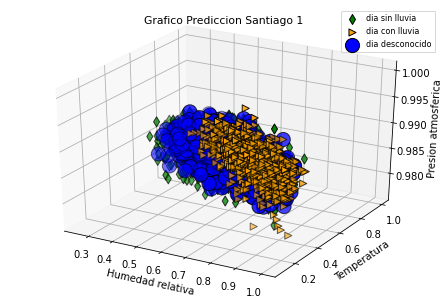

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['font.size']=9
ax.scatter(santiago_0_inicial['HR_norm'], santiago_0_inicial['Ts_norm'], santiago_0_inicial['QFE_norm'],c='green',marker='d',edgecolors='black',s=50,label='dia sin lluvia')
ax.scatter(santiago_1_inicial['HR_norm'], santiago_1_inicial['Ts_norm'], santiago_1_inicial['QFE_norm'],c='orange',edgecolors='black',marker='>',s=50,label='dia con lluvia')
ax.scatter(prueba_x1['HR_norm'],prueba_x1['Ts_norm'],prueba_x1['QFE_norm'],c='blue',edgecolors='black',s=200,label='dia desconocido')
ax.legend()
ax.set_xlabel('Humedad relativa')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Presion atmosferica')
ax.set_title('Grafico Prediccion Santiago 1')

plt.show()

**Graficando la situacion final de Santiago**

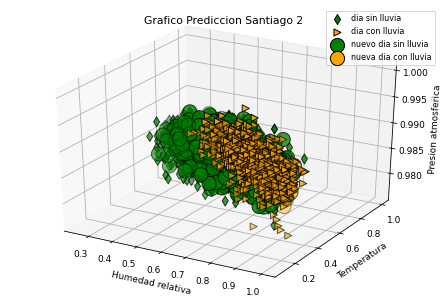

In [31]:
fig = plt.figure()
ax = Axes3D(fig)
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['font.size']=9
ax.scatter(santiago_0_inicial['HR_norm'], santiago_0_inicial['Ts_norm'], santiago_0_inicial['QFE_norm'],c='green',marker='d',edgecolors='black',s=50,label='dia sin lluvia')
ax.scatter(santiago_1_inicial['HR_norm'], santiago_1_inicial['Ts_norm'], santiago_1_inicial['QFE_norm'],c='orange',edgecolors='black',marker='>',s=50,label='dia con lluvia')
ax.scatter(santiago_0_final['HR_norm'], santiago_0_final['Ts_norm'], santiago_0_final['QFE_norm'],c='green',edgecolors='black',s=200,label='nuevo dia sin lluvia')
ax.scatter(santiago_1_final['HR_norm'], santiago_1_final['Ts_norm'], santiago_1_final['QFE_norm'],c='orange',edgecolors='black',s=200,label='nueva dia con lluvia')
plt.legend()
ax.set_xlabel('Humedad relativa')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Presion atmosferica')
ax.set_title('Grafico Prediccion Santiago 2')

plt.show()

### Para Puerto Montt

Se seguirá el mismo procedimiento, que el aplicado para el caso de Santiago

In [32]:
puerto_montt.loc[:,'HR_norm']=puerto_montt['HR_Valor']/np.max(puerto_montt['HR_Valor'])
puerto_montt.loc[:,'Ts_norm']=puerto_montt['Ts_Valor']/np.max(puerto_montt['Ts_Valor'])
puerto_montt.loc[:,'QFE_norm']=puerto_montt['QFE_Valor']/np.max(puerto_montt['QFE_Valor'])
puerto_montt.loc[:,'RRR24_norm']=puerto_montt['RRR24_Valor']/np.max(puerto_montt['RRR24_Valor'])
puerto_montt.head()

,codigo,Ts_Valor,QFE_Valor,RRR24_Valor,HR_Valor,HR_norm,Ts_norm,QFE_norm,RRR24_norm
momento,,,,,,,,,
01-01-1993,410005,13.921739,1008.514286,0,85.260870,0.852609,0.578566,0.980580,0.0
02-01-1993,410005,15.125000,1005.487500,0,81.750000,0.817500,0.628571,0.977637,0.0
03-01-1993,410005,16.650000,1003.462500,0,78.083333,0.780833,0.691948,0.975668,0.0
04-01-1993,410005,16.329167,1006.300000,1,81.583333,0.815833,0.678615,0.978427,1.0
05-01-1993,410005,12.979167,1007.462500,0,75.750000,0.757500,0.539394,0.979557,0.0


In [33]:
classifier_puerto_montt = neighbors.KNeighborsClassifier(n_neighbors=100, weights='distance')

In [34]:
puerto_montt_random=puerto_montt_int.sample(frac=1)
eje_x2=puerto_montt_random[['HR_norm','Ts_norm','QFE_norm']]
eje_y2=puerto_montt_random['RRR24_Valor']
entrenamiento_x2=eje_x2[:7537]
entrenamiento_y2=eje_y2[:7537]
prueba_x2=eje_x2[7537:]
prueba_y2=eje_y2[7537:]

In [35]:
classifier_puerto_montt.fit(entrenamiento_x2,entrenamiento_y2)

KNeighborsClassifier(n_neighbors=100, weights='distance')

In [36]:

test2=classifier_puerto_montt.predict(prueba_x2)
accuracy_score(test2,prueba_y2)

0.6728452270620945

En este caso el porcentaje del clasificador es de $\approx 70\%$

#### Ahora se procedera a ver el funcionamiento de este metodod mediante el siguiente grafico para el caso de Puerto Montt, siguiendo el mismo procedimiento que para el caso de Santiago

In [37]:
conjunto_prueba_puerto_montt=prueba_x2
conjunto_prueba_puerto_montt['RRR24_Valor']=test2

puerto_montt_0_inicial=puerto_montt_random[:7537]
puerto_montt_0_inicial= puerto_montt_random[(puerto_montt_random['RRR24_Valor']==0)]

puerto_montt_1_inicial=puerto_montt_random[:7537]
puerto_montt_1_inicial=puerto_montt_random[(puerto_montt_random['RRR24_Valor']>0)]


puerto_montt_0_final=conjunto_prueba_puerto_montt[(conjunto_prueba_puerto_montt['RRR24_Valor']==0)]
puerto_montt_1_final=conjunto_prueba_puerto_montt[(conjunto_prueba_puerto_montt['RRR24_Valor']>0)]

<ipython-input-37-15d9ed1dd2f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conjunto_prueba_puerto_montt['RRR24_Valor']=test2


**Graficando la situacion inicial para Puerto Montt**

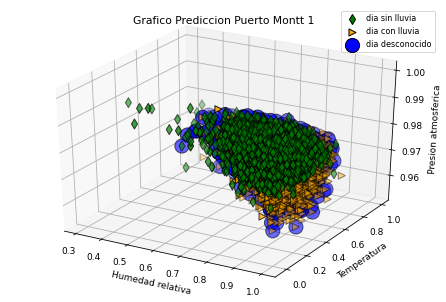

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(puerto_montt_0_inicial['HR_norm'], puerto_montt_0_inicial['Ts_norm'], puerto_montt_0_inicial['QFE_norm'],c='green',marker='d',edgecolors='black',s=50,label='dia sin lluvia')
ax.scatter(puerto_montt_1_inicial['HR_norm'], puerto_montt_1_inicial['Ts_norm'], puerto_montt_1_inicial['QFE_norm'],c='orange',edgecolors='black',marker='>',s=50,label='dia con lluvia')
ax.scatter(prueba_x2['HR_norm'],prueba_x2['Ts_norm'],prueba_x2['QFE_norm'],c='blue',edgecolors='black',s=200,label='dia desconocido')
plt.legend()
ax.set_xlabel('Humedad relativa')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Presion atmosferica')
ax.set_title('Grafico Prediccion Puerto Montt 1')

plt.show()

**Graficando la situacion final para Puerto Montt**

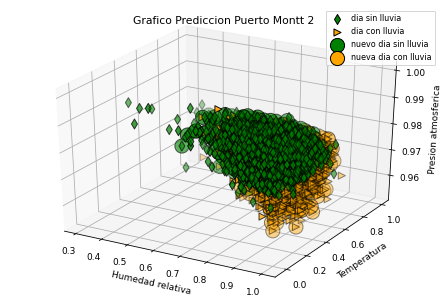

In [39]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(puerto_montt_0_inicial['HR_norm'], puerto_montt_0_inicial['Ts_norm'], puerto_montt_0_inicial['QFE_norm'],c='green',marker='d',edgecolors='black',s=50,label='dia sin lluvia')
ax.scatter(puerto_montt_1_inicial['HR_norm'], puerto_montt_1_inicial['Ts_norm'], puerto_montt_1_inicial['QFE_norm'],c='orange',edgecolors='black',marker='>',s=50,label='dia con lluvia')
ax.scatter(puerto_montt_0_final['HR_norm'], puerto_montt_0_final['Ts_norm'], puerto_montt_0_final['QFE_norm'],c='green',edgecolors='black',s=200,label='nuevo dia sin lluvia')
ax.scatter(puerto_montt_1_final['HR_norm'], puerto_montt_1_final['Ts_norm'], puerto_montt_1_final['QFE_norm'],c='orange',edgecolors='black',s=200,label='nueva dia con lluvia')
plt.legend()
ax.set_xlabel('Humedad relativa')
ax.set_ylabel('Temperatura')
ax.set_zlabel('Presion atmosferica')
ax.set_title('Grafico Prediccion Puerto Montt 2')

plt.show()

# Analisis

Se puede apreciar que en el caso de Santiago, se obtuvo que nuestra prediccion nos dio un resultado del $\approx
90\%$, no asi como en el caso de Puerto Montt, donde las predicciones no fueron tan precisas $\approx70\%$, estos resultados pueden deberse a las diferencias que hay entre la formacion de gotas en nubes tibias y nubes heladas,como es estudiado en (Wallace, J., & Hobbs, P. (2011), ya que la presencia de agua en estado solido, afecta la efectividad de la ecuacion de Clausius-Clapeyron, que se usa cuando solo hay una transicion entre  dos estados de la materia.



# Conclusion

Se puede concluir que el uso de la presión atmosférica, temperatura y humedad relativa, pueden ser de utilidad para ayudar a predecir las precipitaciones, aunque no siempre con una alta precisión, ya que para casos como el de Puerto Montt, los porcentajes de precisión son inferiores que a los de Santiago. Esto se puede explicar mediante las diferentes condiciones en que se crean las gotas de agua según la temperatura de las nubes, ya que, a partir de los 0°C, existe el agua en estado sólido, que complica las predicciones, ya que el modelo planteado contemplaba que solo interactuaban el agua en estado líquido con agua en estado gaseoso

Finalmente se pueden considerar a estas variables climatológicas como herramientas que permiten predecir las precipitaciones para las ciudades de Santiago y Puerto Montt con una efectividad adecuada para ambas ciudades, mediante un modelo relativamente simple que implementa tecnicas de machine learning.


# Bibliografia:
* [1] 2017. Atlas Agroclimático De Chile. 1st ed. Santiago: Universidad de Chile.
* [2]GLOSARIO METEOROLOGICO. (agosto de 2019). GLOSARIO METEOROLOGICO. INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIOS AMBIENTALES –IDEAM Recuperado de http://www.ideam.gov.co/documents/11769/72085840/Anexo+10.+Glosario+meteorol%C3%B3gico.pdf/6a90e554-6607-43cf-8845-9eb34eb0af8e
*  [3] Fuenzalida, V. (2020). Apuntes de termodinamica. Universidad de Chile
*  [4] Portal de Servicios Climáticos - Dirección Meteorológica de Chile. (2020). https://climatologia.meteochile.gob.cl/
*  [5] Wallace, J., & Hobbs, P. (2011). Atmospheric science. Amsterdam: Elsevier Acad. Press.